In [92]:
import json
import pandas as pd

records = [json.loads(line) for line in open('example.txt')]
df = pd.DataFrame(records)
df.head()

a   c   nk  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  1.0   
1                             GoogleMaps/RochesterNY  US  0.0   
2  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  1.0   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...  BR  0.0   
4  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  0.0   

                  tz  gr       g       h         l              al         hh  \
0   America/New_York  MA  A6qOVH  wfLQtf   orofrog  en-US,en;q=0.8  1.usa.gov   
1     America/Denver  UT  mwszkS  mwszkS     bitly             NaN       j.mp   
2   America/New_York  DC  xxr3Qb  xxr3Qb     bitly           en-US  1.usa.gov   
3  America/Sao_Paulo  27  zCaLwp  zUtuOu  alelex88           pt-br  1.usa.gov   
4   America/New_York  MA  9b6kNl  9b6kNl     bitly  en-US,en;q=0.8     bit.ly   

                                                   r  \
0  http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...   
1                           http://www.AwareMap.com/   
2                               http://t.co/03elZC4Q   
3                                             direct   
4                http://www.shrewsbury-ma.gov/selco/   

                                                   u             t  \
0        http://www.ncbi.nlm.nih.gov/pubmed/22415991  1.331923e+09   
1        http://www.monroecounty.gov/etc/911/rss.php  1.331923e+09   
2  http://boxer.senate.gov/en/press/releases/0316...  1.331923e+09   
3            http://apod.nasa.gov/apod/ap120312.html  1.331923e+09   
4  http://www.shrewsbury-ma.gov/egov/gallery/1341...  1.331923e+09   

             hc          cy                        ll  _heartbeat_   kw  
0  1.331823e+09     Danvers   [42.576698, -70.954903]          NaN  NaN  
1  1.308262e+09       Provo  [40.218102, -111.613297]          NaN  NaN  
2  1.331920e+09  Washington     [38.9007, -77.043098]          NaN  NaN  
3  1.331923e+09        Braz  [-23.549999, -46.616699]          NaN  NaN  
4  1.273672e+09  Shrewsbury   [42.286499, -71.714699]          NaN  NaN

Plot top 10 time-zones

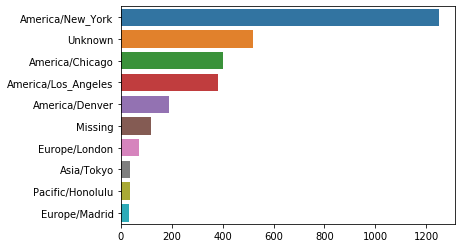

In [94]:
import seaborn as sns

clean_tz = df.tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts().nlargest(10)

sns.barplot(tz_counts.values, tz_counts.index)

Now let's separate the counts by Mac and non-Mac users.

In [140]:
import numpy as np
df['os'] = np.where(df.a.str.contains('Mac'), 'Mac', 'No Mac')

agg_counts = df.groupby(['tz', 'os']).size().unstack()
indexer = agg_counts.sum(1).argsort()

count_subset = agg_counts.take(indexer[-10:])
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[count_subset.tz == ''] = 'Unknown'
count_subset

tz       os    total
0     America/Sao_Paulo      Mac       10
1     America/Sao_Paulo   No Mac       23
2         Europe/Madrid      Mac        5
3         Europe/Madrid   No Mac       30
4      Pacific/Honolulu   No Mac       36
5            Asia/Tokyo      Mac        2
6            Asia/Tokyo   No Mac       35
7         Europe/London      Mac       32
8         Europe/London   No Mac       42
9        America/Denver      Mac       10
10       America/Denver   No Mac      181
11  America/Los_Angeles      Mac       82
12  America/Los_Angeles   No Mac      300
13      America/Chicago      Mac       96
14      America/Chicago   No Mac      304
15              Unknown  Unknown  Unknown
16              Unknown  Unknown  Unknown
17     America/New_York      Mac      267
18     America/New_York   No Mac      984